## Random Walk

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Introduction

* random walk refers to the apparently random movement of some entity
  - i.e., the past has no bearing on the future
* in a time-driven simluation, an entity may take the form of a **cell** on a **grid**
* under random walk conditions the entity may move at random to any adjacent (perhaps under constraints)

* a certain type of simulation involving grids is a **cellular automaton**
* these are dynamic models that are discrete in space, state, and time
* space takes the form of a 1-, 2- or 3-D **grid** (or array or lattice)
* a **site** or **cell** has a state, the number of which are finite
* **Rules** specify local relationships and indicate how cells are to change state
* Often we will want to animate our simulations to watch how they change over time

* examples of cellular automata models include
* Brownian motion for the behavior of a molecule suspended in liquid
* Polymerase Chain Reactions to simulate DNA mutations
* Spread of fire
* Schelling's (1971) housing segregation model

#### Algorithm for Random Walk

* Suppose that in a RW simulation at each time step an entity goes diagonally in a NE, NW, SE, or SW direction at random
* To move in these directions, each entity first walks east or west one unit then north or south one unit
* The entity covers a diagonal distance of $\sqrt{2}$ units

#### Algorithm 1

* variables x and y store the horizontal and vertical coordinates of the current location
 - we will use a single 2-d array
* **locations** holds a list of locations in the path of the entity
* the entity starts at the origin (0, 0)
* $n$ steps are taken
* set a seed
* at each step we draw a direction for east or west and a direction for north or south
* we then generate a new (x,y) point and append it to our list
* we can then visualize our path

* **Aside:** how to generate directions?

One Option: Use a dictionary

In [2]:
direction = {0 : -1, 1 : 1}

In [3]:
np.random.seed(12345)
np.random.randint(2, size=5)

array([0, 1, 1, 1, 0])

In [4]:
direction[np.random.randint(2)]

1

Another Option: Use `np.random.choice`<br />
**Note** this was added in numpy 1.7.0.

In [5]:
np.random.seed(12345)
np.random.choice([-1, 1], size=5)

array([-1,  1,  1,  1, -1])

In [6]:
np.random.seed(12345)
directions = np.random.choice([-1,1], size=(10,2))
directions

array([[-1,  1],
       [ 1,  1],
       [-1,  1],
       [-1, -1],
       [ 1, -1],
       [ 1,  1],
       [-1,  1],
       [ 1, -1],
       [ 1,  1],
       [ 1, -1]])

In [7]:
np.cumsum(directions, axis=0)

array([[-1,  1],
       [ 0,  2],
       [-1,  3],
       [-2,  2],
       [-1,  1],
       [ 0,  2],
       [-1,  3],
       [ 0,  2],
       [ 1,  3],
       [ 2,  2]])

In [8]:
def random_path(initial_point, nsteps):
    directions = np.random.choice([-1, 1], size=(nsteps, 2))
    path = initial_point + np.cumsum(directions, axis=0)
    # append the initial point back to the front
    path = np.row_stack((initial_point, path))
    return path

In [9]:
origin = [0, 0]

In [10]:
np.random.seed(12345)
path = random_path(origin, 15)

In [11]:
path

array([[ 0,  0],
       [-1,  1],
       [ 0,  2],
       [-1,  3],
       [-2,  2],
       [-1,  1],
       [ 0,  2],
       [-1,  3],
       [ 0,  2],
       [ 1,  3],
       [ 2,  2],
       [ 1,  1],
       [ 2,  2],
       [ 3,  1],
       [ 4,  0],
       [ 3,  1]])

* We might want to calculate the distance traveled from the origin.

In [12]:
from scipy import spatial

In [13]:
from scipy.spatial import distance

In [14]:
distance.euclidean(path[0], path[-1])

3.1622776601683795

* Remember Euclidean distance is just 
$$d = \sqrt{(x-x_0)^2+(y-y_0)^2}$$

In [16]:
print((path[0] - path[-1])**2)

[9 1]


In [17]:
print(np.sqrt(np.sum((path[-1] - path[0])**2)))

3.16227766017


In [18]:
np.hypot(path[0], path[-1])

array([ 3.,  1.])

In [19]:
np.sqrt(np.sum(np.hypot(path[0], path[-1])**2))

3.1622776601683795

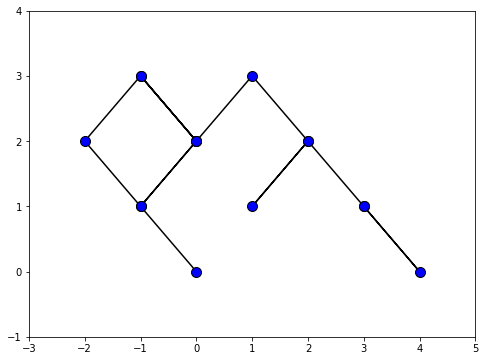

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(*path.T, linestyle="-", marker="o", color="k",
        markerfacecolor="b", markersize=10)
ax.set_xlim(-3, 5);
ax.set_ylim(-1, 4);
plt.show();

#### Animate Path

* There are a few options to do animation with matplotlib
* You can save plots at each of the steps and use outside tools to animate them

In [ ]:
# execute a command delete the files if they already exist
# ! allows you to run commands at the shell

!rm ./animate_path*

In [21]:
for i in range(1, len(path)+1):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(*path[:i].T, linestyle="-", marker="o", color="k",
        markerfacecolor="b", markersize=10);
    # plot the most recent with a different color
    ax.plot(*path[i-1], marker="o", markerfacecolor="red", 
        markersize=10);
    ax.set_xlim(-3, 5);
    ax.set_ylim(-1, 4);
    fig.savefig("./animate_path%02d.png" % i)

# close them before they display
plt.close('all')

* Now we could use a tool like `ffmpeg` to turn this into an animation

In [22]:
!rm animated_path.*

rm: animated_path.*: No such file or directory


Note: Use webm format because it works by default in firefox and chrome.

On Windows you may need to give the path to ffmpeg.exe or add the directory to the PATH.

In [25]:
!ffmpeg -f image2 -r 1/2 -i animate_path%02d.png -r 30 animated_path.mp4

ffmpeg version 3.3.1 Copyright (c) 2000-2017 the FFmpeg developers
  built with Apple LLVM version 8.1.0 (clang-802.0.42)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.3.1 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-libmp3lame --enable-libx264 --enable-libxvid --enable-opencl --disable-lzma --enable-vda
  libavutil      55. 58.100 / 55. 58.100
  libavcodec     57. 89.100 / 57. 89.100
  libavformat    57. 71.100 / 57. 71.100
  libavdevice    57.  6.100 / 57.  6.100
  libavfilter     6. 82.100 /  6. 82.100
  libavresample   3.  5.  0 /  3.  5.  0
  libswscale      4.  6.100 /  4.  6.100
  libswresample   2.  7.100 /  2.  7.100
  libpostproc    54.  5.100 / 54.  5.100
Input #0, image2, from 'animate_path%02d.png':
  Duration: 00:00:32.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 576x432 [SAR 2834:2834 DAR 4:3], 0.50 fps, 0.50 tbr, 0.50 tb

<video width="640" height="480" controls>
  <source src="files/animated_path.mp4">
Your browser does not support the video tag.
</video>

* `matplotlib` also has [built-in animation tools](http://matplotlib.org/api/animation_api.html)

#### Average Distance Covered

* Great variation can exist in the paths and the final distance traveled
* We may be interested in running this a number of times and taking averages
* Since we're using Python, we want to avoid loops
* How can we accomplish this without any loops?

In [26]:
nsteps = 25
num_tests = 100

origin = np.array([0, 0])
directions = np.random.choice([-1, 1], size=(nsteps, num_tests, 2))

* We have an array thats $(nsteps \times num\_tests\times 2)$
* The middle dimension is over the number of different runs
* The first run, for example, looks like this

In [27]:
directions[:, 0, :]

array([[ 1,  1],
       [ 1,  1],
       [-1,  1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [-1,  1],
       [-1,  1],
       [ 1,  1],
       [-1,  1],
       [-1, -1],
       [-1,  1],
       [ 1,  1],
       [ 1, -1],
       [-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1],
       [ 1,  1],
       [-1, -1],
       [ 1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [-1, -1]])

* We can get the distance from the origin by summing over the directional moves

In [28]:
origin + np.sum(directions[:, 0, :], axis=0)

array([-1,  5])

* We can use broadcasting to get the end point of each run
* No loops!

In [29]:
origin + directions.sum(axis=0)

array([[ -1,   5],
       [  3,   7],
       [ -7,   5],
       [  1,   1],
       [ -5,   1],
       [ -5,  -1],
       [ -3,  -1],
       [  1,  -1],
       [ -3,   1],
       [ -3,  -1],
       [ -1,   5],
       [  7,   5],
       [  5,   3],
       [  7,  -3],
       [  1,   1],
       [ -9,   7],
       [  7,   1],
       [ -3,   7],
       [ -7,   5],
       [  9,   1],
       [  5,   7],
       [ -5,  -1],
       [ -1,  13],
       [ -1,   7],
       [  5,  -3],
       [ -7,  -1],
       [  3,  -3],
       [-11,  -3],
       [  1,   5],
       [ -3,  -5],
       [  5,   9],
       [  3,  -1],
       [  1,  -1],
       [  1,  -1],
       [  1,  -3],
       [  5,   1],
       [  7,   5],
       [ -3,   5],
       [ -3,  -3],
       [ -7,  -1],
       [ -9,   1],
       [  3,   1],
       [  3,   7],
       [ -3,  -3],
       [  1,   1],
       [ -5,   3],
       [  5,  -3],
       [ -5,   1],
       [  5,   5],
       [  7,   7],
       [ -1,  -5],
       [ -1,  -7],
       [ -3,

In [30]:
end_points = origin + directions.sum(axis=0)

* End points now contains the end point of each run
* We can get the total distance covered by each using our Euclidean distance formula and broadcasting

In [31]:
np.sqrt(np.sum((origin - end_points)**2, axis=1))

array([  5.09901951,   7.61577311,   8.60232527,   1.41421356,
         5.09901951,   5.09901951,   3.16227766,   1.41421356,
         3.16227766,   3.16227766,   5.09901951,   8.60232527,
         5.83095189,   7.61577311,   1.41421356,  11.40175425,
         7.07106781,   7.61577311,   8.60232527,   9.05538514,
         8.60232527,   5.09901951,  13.03840481,   7.07106781,
         5.83095189,   7.07106781,   4.24264069,  11.40175425,
         5.09901951,   5.83095189,  10.29563014,   3.16227766,
         1.41421356,   1.41421356,   3.16227766,   5.09901951,
         8.60232527,   5.83095189,   4.24264069,   7.07106781,
         9.05538514,   3.16227766,   7.61577311,   4.24264069,
         1.41421356,   5.83095189,   5.83095189,   5.09901951,
         7.07106781,   9.89949494,   5.09901951,   7.07106781,
         3.16227766,   8.60232527,   5.83095189,   5.09901951,
         3.16227766,   9.48683298,   5.83095189,   5.83095189,
        12.08304597,   9.05538514,   4.24264069,   3.16

In [32]:
nsteps = 25
num_tests = 100

origin = [0, 0]

def random_path_montecarlo(origin, nsteps, nruns):
    directions = np.random.choice([-1, 1], size=(nsteps, nruns, 2))
    end_points = origin + directions.sum(axis=0)
    dists = np.sqrt(np.sum((origin - end_points)**2, axis=1))
    return dists.mean()

In [33]:
avg_distance = random_path_montecarlo(origin, nsteps, num_tests)

In [35]:
print(avg_distance)

6.85217183061


#### Relationship between nsteps and Distance Covered

In [36]:
avg_distances = [random_path_montecarlo(origin, n, num_tests) for n in range(1,51)]

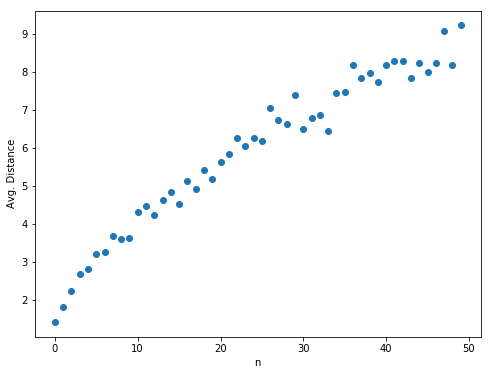

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(avg_distances, "o")
ax.set_xlabel("n")
ax.set_ylabel("Avg. Distance");
plt.show();